In [1]:
#| echo: false
import pandas as pd

def split_wide_table(df, padding=1):
    """Split a wide table over mutliple smaller tables."""
    cols = df.columns
    width = pd.options.display.width
    _cols = []
    _w = 0
    continues = False
    for col in cols:
        if (len("".join(_cols)) + (len(_cols)+1)*padding) < width:
            _cols.append(col)
        else:
            print("\n")
            display(df[_cols].style.hide(axis="index"))
            _cols = []
            continues = False
    if _cols:
        print("\n")
        display(df[_cols].style.hide(axis="index"))
        
# pd.options.display.show_dimensions=False
#pd.options.display.width = 80
#pd.options.display.max_colwidth = 10
#pd.options.display.max_columns = 10

# Getting Started With `FastF1`

The [`theOehrly/Fast-F1`](https://github.com/theOehrly/Fast-F1) Python package [[docs](https://theoehrly.github.io/Fast-F1)] provides a relatively straightforward way of downloading and accessing telemetry data from the Formula One website and the *ergast* historical motor racing results database.

In this chapter, we'll have a quick overview of the package to get a feel for the sorts of things we can do with it, before diving in to more detail in other chapters.

Let's start off by importing the package:

In [2]:
#Install with:
# %pip install --upgrade fastf1
# Dev version:
# %pip install --upgrade https://github.com/theOehrly/Fast-F1/archive/refs/heads/master.zip
import fastf1 as ff1

The package API may change rapidly, and may include breaking changes.

The code used in this chapter relates to version `2.2.9`.

In [3]:
# Check the package version
ff1.__version__

'2.2.9'

To minimise the number of calls made to the website, the package can be configured to cache data whenever possible.

In [4]:
from pathlib import Path

cachedir = ".cache"
Path(cachedir).mkdir(parents=True, exist_ok=True)

ff1.Cache.enable_cache(cachedir)  

:::{.callout-note}
If we request the same data again, the locally cached data will be used, rather than a call being made to the Formula One data service.

This has the advantage that if you have already cached the data, you can load it even if you are offline.
:::

Data can be retrieved for specific sessions of specific races.

*As the data is loaded, a diagnostic trace is displayed showing what data has been retrieved, and from where (for example, downloaded from the original API or retrieved from the cache).*

In [ ]:
# Select:
# - a practice session ("FP1", "FP2", "FP3")
# - a sprint shootout / qualifying session ("SS", "SQ")
# - sprint race ("S")
# - a qualifying session ("Q")
# - a race session ("R")
monza_quali = ff1.get_session(2019, 'Monza', 'Q')

monza_quali.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

A good selection of metadata is available to describe the associated event.

For example, we can get the name and date of the event:he event:

In [6]:
monza_quali.name, monza_quali.t0_date

('Qualifying', Timestamp('2019-09-07 12:45:01.093000'))

Or summary information for the weekend as a whole:

In [7]:
weekend = monza_quali.event
weekend

RoundNumber                                                    14
Country                                                     Italy
Location                                                    Monza
OfficialEventName    FORMULA 1 GRAN PREMIO HEINEKEN D'ITALIA 2019
EventDate                                     2019-09-08 00:00:00
EventName                                      Italian Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                            2019-09-06 11:00:00+02:00
Session1DateUtc                               2019-09-06 09:00:00
Session2                                               Practice 2
Session2Date                            2019-09-06 15:00:00+02:00
Session2DateUtc                               2019-09-06 13:00:00
Session3                                               Practice 3
Session3Date                            2019-09-07 12:00:00+02:00
Session3Da

We can review the weather over the weekend:

In [8]:
monza_quali.weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:13.893000,22.0,51.3,993.2,False,33.3,238,0.6
1,0 days 00:01:13.905000,22.1,50.8,993.1,False,33.7,212,0.8
2,0 days 00:02:13.918000,22.2,51.3,993.1,False,33.7,184,0.6
3,0 days 00:03:13.930000,22.2,52.3,993.2,False,33.7,116,1.2
4,0 days 00:04:13.943000,22.1,53.3,993.1,False,33.9,0,1.2


We can list race control messages:

In [9]:
monza_quali.race_control_messages.head()

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber,Lap
0,2019-09-07 13:00:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None,None
1,2019-09-07 13:13:16,Flag,YELLOW IN TRACK SECTOR 6,None,YELLOW,Sector,6.0,None,None
2,2019-09-07 13:13:20,Flag,CLEAR IN TRACK SECTOR 6,None,CLEAR,Sector,6.0,None,None
3,2019-09-07 13:13:27,Flag,RED FLAG,None,RED,Track,NaN,None,None
4,2019-09-07 13:14:11,CarEvent,CAR 11 (PER) STOPPED AT TURN 3,None,None,None,NaN,11,None


We can review status changes over the course of a session:

In [10]:
monza_quali.session_status.head()

,Time,Status
0,0 days 00:00:03.035000,Inactive
1,0 days 00:14:59.169000,Started
2,0 days 00:28:26.040000,Aborted
3,0 days 00:30:43.054000,Inactive
4,0 days 00:31:59.259000,Started


We can get session results:

In [11]:
split_wide_table(monza_quali.results.head())

DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName
16,C LECLERC,LEC,leclerc,Ferrari,dc0000,ferrari,Charles
44,L HAMILTON,HAM,hamilton,Mercedes,00d2be,mercedes,Lewis
77,V BOTTAS,BOT,bottas,Mercedes,00d2be,mercedes,Valtteri
5,S VETTEL,VET,vettel,Ferrari,dc0000,ferrari,Sebastian
3,D RICCIARDO,RIC,ricciardo,Renault,fff500,renault,Daniel


FullName,HeadshotUrl,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2
Charles Leclerc,https://www.formula1.com/content/dam/fom-website/drivers/C/CHALEC01_Charles_Leclerc/chalec01.png,,1.000000,,nan,0 days 00:01:20.126000,0 days 00:01:19.553000
Lewis Hamilton,https://www.formula1.com/content/dam/fom-website/drivers/L/LEWHAM01_Lewis_Hamilton/lewham01.png,,2.000000,,nan,0 days 00:01:20.272000,0 days 00:01:19.464000
Valtteri Bottas,https://www.formula1.com/content/dam/fom-website/drivers/V/VALBOT01_Valtteri_Bottas/valbot01.png,,3.000000,,nan,0 days 00:01:20.156000,0 days 00:01:20.018000
Sebastian Vettel,https://www.formula1.com/content/dam/fom-website/drivers/S/SEBVET01_Sebastian_Vettel/sebvet01.png,,4.000000,,nan,0 days 00:01:20.378000,0 days 00:01:19.715000
Daniel Ricciardo,https://www.formula1.com/content/dam/fom-website/drivers/D/DANRIC01_Daniel_Ricciardo/danric01.png,,5.000000,,nan,0 days 00:01:20.374000,0 days 00:01:19.833000


Time,Status,Points
NaT,,nan
NaT,,nan
NaT,,nan
NaT,,nan
NaT,,nan


## Driver Details

A wide range of data is available, and can be can be explored in several ways.

For example, we can get the data for a particular driver, and identify their fastest lap, along with various summary statistics for it:

Here's an example of the driver details:

In [12]:
monza_quali.get_driver('LEC')

DriverNumber                                                         16
BroadcastName                                                 C LECLERC
Abbreviation                                                        LEC
DriverId                                                        leclerc
TeamName                                                        Ferrari
TeamColor                                                        dc0000
TeamId                                                          ferrari
FirstName                                                       Charles
LastName                                                        Leclerc
FullName                                                Charles Leclerc
HeadshotUrl           https://www.formula1.com/content/dam/fom-websi...
CountryCode                                                            
Position                                                            1.0
ClassifiedPosition                                              

We can retrieve summary data about each lap:

In [13]:
#| output: false
monza_quali.laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:21:01.358000,LEC,16,NaT,1.0,1.0,0 days 00:19:26.847000,NaT,NaT,0 days 00:00:30.837000,...,True,Ferrari,0 days 00:19:26.847000,2019-09-07 13:04:27.940,1,NaN,False,,False,False
1,0 days 00:22:21.775000,LEC,16,0 days 00:01:20.417000,2.0,1.0,NaT,NaT,0 days 00:00:26.982000,0 days 00:00:26.734000,...,True,Ferrari,0 days 00:21:01.358000,2019-09-07 13:06:02.451,1,NaN,False,,False,True
2,0 days 00:24:03.991000,LEC,16,0 days 00:01:42.216000,3.0,1.0,NaT,NaT,0 days 00:00:33.988000,0 days 00:00:35.632000,...,True,Ferrari,0 days 00:22:21.775000,2019-09-07 13:07:22.868,1,NaN,False,,False,True
3,0 days 00:25:24.117000,LEC,16,0 days 00:01:20.126000,4.0,1.0,NaT,NaT,0 days 00:00:26.749000,0 days 00:00:26.777000,...,True,Ferrari,0 days 00:24:03.991000,2019-09-07 13:09:05.084,1,NaN,False,,False,True
4,0 days 00:27:09.461000,LEC,16,0 days 00:01:45.344000,5.0,1.0,NaT,NaT,0 days 00:00:33.884000,0 days 00:00:37.703000,...,True,Ferrari,0 days 00:25:24.117000,2019-09-07 13:10:25.210,1,NaN,False,,False,True


In [14]:
def pretty_time_delta(timedelta, typ="hm"):
    """Display time delta in a pretty way."""
    seconds = timedelta.total_seconds()
    days, seconds = divmod(seconds, 86400)
    hours, seconds = divmod(seconds, 3600)
    minutes, seconds = divmod(seconds, 60)

    if typ=='hm':
        return f'{hours:02.0f}:{minutes:.0f}:{seconds:06.3f}'

    if days > 0:
        return f'{days:.0f}:{hours:.0f}:{minutes:.0f}:{seconds:06.3f}'
    elif hours > 0:
        return f'{hours:.0f}:{minutes:.0f}:{seconds:06.3f}'
    elif minutes > 0:
        return f'{minutes:02.0f}:{seconds:06.3f}'
    else:
        return f'00:{seconds:06.3f}'

In [15]:
monza_quali.laps['Time'].apply(pretty_time_delta)[0]

'00:21:01.358'

In [16]:
#| echo: false
cols = monza_quali.laps.columns
display(monza_quali.laps[cols[:4]])
print("\n")
display(monza_quali.laps[cols[4:8]])

,Time,Driver,DriverNumber,LapTime
0,0 days 00:21:01.358000,LEC,16,NaT
1,0 days 00:22:21.775000,LEC,16,0 days 00:01:20.417000
2,0 days 00:24:03.991000,LEC,16,0 days 00:01:42.216000
3,0 days 00:25:24.117000,LEC,16,0 days 00:01:20.126000
4,0 days 00:27:09.461000,LEC,16,0 days 00:01:45.344000
...,...,...,...,...
270,0 days 00:36:38.150000,KUB,88,0 days 00:01:22.356000
271,0 days 00:38:37.508000,KUB,88,0 days 00:01:59.358000
272,0 days 00:33:27.227000,VER,33,NaT
273,0 days 00:35:05.865000,VER,33,NaT


,LapNumber,Stint,PitOutTime,PitInTime
0,1.0,1.0,0 days 00:19:26.847000,NaT
1,2.0,1.0,NaT,NaT
2,3.0,1.0,NaT,NaT
3,4.0,1.0,NaT,NaT
4,5.0,1.0,NaT,NaT
...,...,...,...,...
270,8.0,3.0,NaT,NaT
271,9.0,3.0,NaT,0 days 00:38:18.023000
272,1.0,1.0,0 days 00:27:27.151000,0 days 00:29:12.808000
273,2.0,2.0,0 days 00:33:27.227000,NaT


The `TrackStatus` column provides a list of status codes that applied during a lap. The [full list](https://github.com/theOehrly/Fast-F1/blob/f935c198e824b2a0c93c0817b89d5f89caf5bb5a/fastf1/api.py#L1216) of codes is given as:

- `'1'`: *Track clear* (beginning of session ot to indicate the end of another status);
- `'2'`: *Yellow flag* (sectors are unknown);
- `'3'`: *???*;
- `'4'`: *Safety Car*;
- `'5'`: *Red Flag*;
- `'6'`: *Virtual Safety Car deployed*;
- `'7'`: *Virtual Safety Car ending* (as indicated on the drivers steering wheel, on tv and so on; status `'1'` will mark the actual end).

## Laps Data

A wide range of data is provided as part of the Laps table:

In [17]:
monza_quali.laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

We can check the laps for a particular car:

In [19]:
lec_laps = monza_quali.laps.pick_drivers(16)
lec_laps[:5]

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:21:01.358000,LEC,16,NaT,1.0,1.0,0 days 00:19:26.847000,NaT,NaT,0 days 00:00:30.837000,...,True,Ferrari,0 days 00:19:26.847000,2019-09-07 13:04:27.940,1,NaN,False,,False,False
1,0 days 00:22:21.775000,LEC,16,0 days 00:01:20.417000,2.0,1.0,NaT,NaT,0 days 00:00:26.982000,0 days 00:00:26.734000,...,True,Ferrari,0 days 00:21:01.358000,2019-09-07 13:06:02.451,1,NaN,False,,False,True
2,0 days 00:24:03.991000,LEC,16,0 days 00:01:42.216000,3.0,1.0,NaT,NaT,0 days 00:00:33.988000,0 days 00:00:35.632000,...,True,Ferrari,0 days 00:22:21.775000,2019-09-07 13:07:22.868,1,NaN,False,,False,True
3,0 days 00:25:24.117000,LEC,16,0 days 00:01:20.126000,4.0,1.0,NaT,NaT,0 days 00:00:26.749000,0 days 00:00:26.777000,...,True,Ferrari,0 days 00:24:03.991000,2019-09-07 13:09:05.084,1,NaN,False,,False,True
4,0 days 00:27:09.461000,LEC,16,0 days 00:01:45.344000,5.0,1.0,NaT,NaT,0 days 00:00:33.884000,0 days 00:00:37.703000,...,True,Ferrari,0 days 00:25:24.117000,2019-09-07 13:10:25.210,1,NaN,False,,False,True


## Car Telemetry Data

Perhaps more interestingly, we can look up regular samples of raw car data for a particular driver:

In [20]:
monza_quali.car_data['16'][:5]

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2019-09-07 12:45:02.230,0,0,0,0,False,0,car,0 days 00:00:01.137000,0 days 00:00:01.137000
1,2019-09-07 12:45:02.470,0,0,0,0,False,0,car,0 days 00:00:01.377000,0 days 00:00:01.377000
2,2019-09-07 12:45:02.710,0,0,0,0,False,0,car,0 days 00:00:01.617000,0 days 00:00:01.617000
3,2019-09-07 12:45:02.990,0,0,0,0,False,0,car,0 days 00:00:01.897000,0 days 00:00:01.897000
4,2019-09-07 12:45:03.230,0,0,0,0,False,0,car,0 days 00:00:02.137000,0 days 00:00:02.137000


An even more helpful telemetry data report includes a derived accumulated distance travelled round the track on each lap, as well as on-track contextual information, such as the distance to, and identity of, the driver ahead on-track.

We can retrieve the telemetry data associated with a particular lap by calling the `get_telemetry()` method on a single lap object:

In [21]:
# We need to index to a particular lap record
lec_laps.iloc[1].get_telemetry()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2019-09-07 13:06:02.451,0 days 00:21:01.358000,,400.271389,0 days 00:00:00,11464,319,8,100,False,8,interpolation,0.031139,0.000005,OnTrack,-1413,-840,1871
3,2019-09-07 13:06:02.521,0 days 00:21:01.428000,,400.271389,0 days 00:00:00.070000,11479,319,8,100,False,8,pos,6.278267,0.001083,OnTrack,-1396,-769,1872
4,2019-09-07 13:06:02.524,0 days 00:21:01.431000,,400.271389,0 days 00:00:00.073000,11509,320,8,100,False,8,car,6.546389,0.001129,OnTrack,-1395,-766,1872
5,2019-09-07 13:06:02.764,0 days 00:21:01.671000,88,400.271389,0 days 00:00:00.313000,11584,323,8,100,False,8,car,28.079722,0.004843,OnTrack,-1375,-566,1872
6,2019-09-07 13:06:02.821,0 days 00:21:01.728000,88,400.671389,0 days 00:00:00.370000,11578,323,8,100,False,8,pos,33.206760,0.005728,OnTrack,-1371,-520,1873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2019-09-07 13:07:22.522,0 days 00:22:21.429000,88,151.229167,0 days 00:01:20.071000,11512,319,8,100,False,8,pos,5754.345540,0.992564,OnTrack,-1438,-1212,1870
598,2019-09-07 13:07:22.525,0 days 00:22:21.432000,88,150.462500,0 days 00:01:20.074000,11539,320,8,100,False,8,car,5754.613056,0.992610,OnTrack,-1437,-1208,1870
599,2019-09-07 13:07:22.765,0 days 00:22:21.672000,88,148.795833,0 days 00:01:20.314000,11575,322,8,100,False,8,car,5776.079722,0.996313,OnTrack,-1413,-945,1870
600,2019-09-07 13:07:22.822,0 days 00:22:21.729000,88,148.795833,0 days 00:01:20.371000,11607,322,8,100,False,8,pos,5781.180410,0.997192,OnTrack,-1408,-889,1871


We can more explicitly return the record for a specific lap by filtering on the `LapNumner`:

In [22]:
def onLap(laps, lap):
    """Get record for a particular lap."""
    return laps[laps["LapNumber"]==lap].iloc[0]

In [23]:
onLap(lec_laps, 2) 

Time                      0 days 00:22:21.775000
Driver                                       LEC
DriverNumber                                  16
LapTime                   0 days 00:01:20.417000
LapNumber                                    2.0
Stint                                        1.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:26.982000
Sector2Time               0 days 00:00:26.734000
Sector3Time               0 days 00:00:26.701000
Sector1SessionTime        0 days 00:21:28.340000
Sector2SessionTime        0 days 00:21:55.074000
Sector3SessionTime        0 days 00:22:21.775000
SpeedI1                                    323.0
SpeedI2                                    342.0
SpeedFL                                    318.0
SpeedST                                    342.0
IsPersonalBest                              True
Compound                                  MEDIUM
TyreLife            

We can get then telemetry for the lap by calling the `.get_telemetry()` method on the returned lap object:

In [24]:
onLap(lec_laps, 2).get_telemetry().head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2019-09-07 13:06:02.451,0 days 00:21:01.358000,,400.271389,0 days 00:00:00,11464,319,8,100,False,8,interpolation,0.031139,0.000005,OnTrack,-1413,-840,1871
3,2019-09-07 13:06:02.521,0 days 00:21:01.428000,,400.271389,0 days 00:00:00.070000,11479,319,8,100,False,8,pos,6.278267,0.001083,OnTrack,-1396,-769,1872
4,2019-09-07 13:06:02.524,0 days 00:21:01.431000,,400.271389,0 days 00:00:00.073000,11509,320,8,100,False,8,car,6.546389,0.001129,OnTrack,-1395,-766,1872
5,2019-09-07 13:06:02.764,0 days 00:21:01.671000,88,400.271389,0 days 00:00:00.313000,11584,323,8,100,False,8,car,28.079722,0.004843,OnTrack,-1375,-566,1872
6,2019-09-07 13:06:02.821,0 days 00:21:01.728000,88,400.671389,0 days 00:00:00.370000,11578,323,8,100,False,8,pos,33.206760,0.005728,OnTrack,-1371,-520,1873


Find the fastest lap from a set of laps:

In [25]:
lec_fast_lap =  lec_laps.pick_fastest()
lec_fast_lap

Time                      0 days 01:11:14.868000
Driver                                       LEC
DriverNumber                                  16
LapTime                   0 days 00:01:19.307000
LapNumber                                   14.0
Stint                                        5.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:26.469000
Sector2Time               0 days 00:00:26.412000
Sector3Time               0 days 00:00:26.426000
Sector1SessionTime        0 days 01:10:22.030000
Sector2SessionTime        0 days 01:10:48.442000
Sector3SessionTime        0 days 01:11:14.868000
SpeedI1                                    329.0
SpeedI2                                    347.0
SpeedFL                                    321.0
SpeedST                                    349.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

We can also iterate over the laps, for example as `monza_quali.laps.pick_driver(16).iterlaps()`; each iteration returns a 2-tuple of the car number and the data for a particular lap.

We can get the telemetry for that driver on each lap by calling the `.get_telemetry()` method on the second (lap) element in the 2-tuple.

## Simple Plots

The `fastf1` package also provides a range of tools to support the plotting of data:

In [27]:
from matplotlib import pyplot as plt
from fastf1 import plotting

# Configures timebase for axis ticks
plotting.setup_mpl(color_scheme="fastf1")

For example, a range of labels and colour schemes are defined for enriching displays:

In [ ]:
#DEPRECATED
# ff1.plotting.TEAM_TRANSLATE

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/plotting/__init__.py:84: FutureWarning: TEAM_TRANSLATE is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


{'MER': 'mercedes',
 'FER': 'ferrari',
 'RBR': 'red bull',
 'MCL': 'mclaren',
 'APN': 'alpine',
 'AMR': 'aston martin',
 'SAU': 'sauber',
 'RB': 'visa rb',
 'HAA': 'haas',
 'WIL': 'williams'}

In [29]:
ff1.plotting.TEAM_COLORS

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/plotting/__init__.py:84: FutureWarning: TEAM_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


{'mercedes': '#00d2be',
 'ferrari': '#dc0000',
 'red bull': '#fcd700',
 'mclaren': '#ff8700',
 'alpine': '#fe86bc',
 'aston martin': '#006f62',
 'sauber': '#00e701',
 'visa rb': '#1634cb',
 'haas': '#ffffff',
 'williams': '#00a0dd'}

In [28]:
ff1.plotting.DRIVER_COLORS

{'valtteri bottas': '#900000',
 'zhou guanyu': '#500000',
 'pierre gasly': '#2b4562',
 'yuki tsunoda': '#356cac',
 'fernando alonso': '#0090ff',
 'esteban ocon': '#70c2ff',
 'sebastian vettel': '#006f62',
 'lance stroll': '#25a617',
 'nico hulkenberg': '#2f9b90',
 'charles leclerc': '#dc0000',
 'carlos sainz': '#ff8181',
 'kevin magnussen': '#ffffff',
 'mick schumacher': '#cacaca',
 'daniel ricciardo': '#ff8700',
 'lando norris': '#eeb370',
 'lewis hamilton': '#00d2be',
 'george russell': '#24ffff',
 'max verstappen': '#0600ef',
 'sergio perez': '#716de2',
 'alexander albon': '#005aff',
 'nicholas latifi': '#012564'}

In [ ]:
#DEPRECATED
#ff1.plotting.COLOR_PALETTE

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/plotting/__init__.py:84: FutureWarning: COLOR_PALETTE is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


['#FF79C6', '#50FA7B', '#8BE9FD', '#BD93F9', '#FFB86C', '#FF5555', '#F1FA8C']

We can trivially plot the speed against the distance round the track, for example, using telemetry data:

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


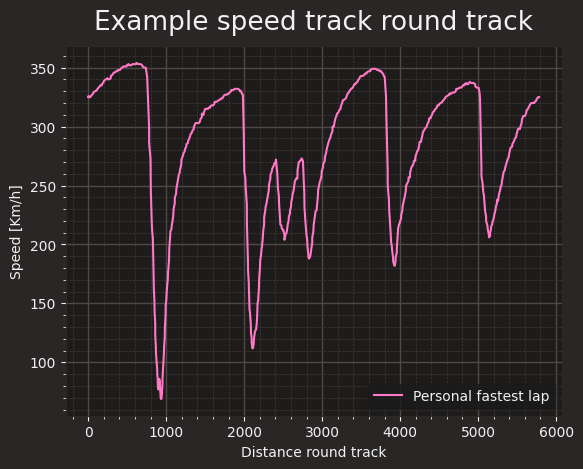

In [31]:
#| code-fold: true
#Get the telemetry for a lap 
lec_telem = lec_fast_lap.get_telemetry()

t = lec_telem['Distance']
vCar = lec_telem['Speed']

# Create a chart object
fig, ax = plt.subplots()

# Plot the speed against distance round track
ax.plot(t, vCar, label='Personal fastest lap')

# Add axis labels
ax.set_xlabel('Distance round track')
ax.set_ylabel('Speed [Km/h]')

# Add title
ax.set_title('Example speed track round track')

# Show legend
ax.legend();

With access to lap data associated with a session, we can generate a wide range of charts that summarise different aspects of the session.

For example, let's get the data from a particular race:

In [32]:
race = ff1.get_session(2020, 'Turkish Grand Prix', 'R')
race.load()

core           INFO 	Loading data for Turkish Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

The following function can be used to plot a chart showing laptimes over the course of a session for one or more drivers.

In [44]:
def plot_laptimes(race, drivers):
    """Plot laptimes over the course of a race."""
    drivers = [drivers] if isinstance(drivers, str) else drivers
    fig, ax = plt.subplots()
    # Generate an appropriately coloured trace for each driver
    for _driver in drivers:
        driver = race.laps.pick_drivers(_driver)
        ax.plot(driver['LapNumber'], driver['LapTime'])
    # Annotate the chart with a title and axis labels
    ax.set_title(" vs ".join(drivers))
    ax.set_xlabel("Lap Number")
    ax.set_ylabel("Lap Time")
    return fig, ax

We can now compare laptimes over the course of the race in a graphical way:

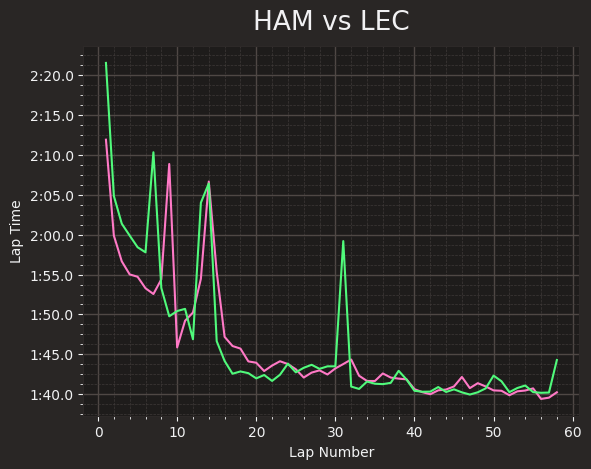

In [45]:
plot_laptimes(race, ["HAM", "LEC"]);

## Telemetry Visualisations via Track Maps

X and Y positions seems to be co-ordinate locations for an on-screen display ( https://github.com/theOehrly/Fast-F1/issues/64 ). This means we probably aren't seeing location data at a resolution good enough to display racing lines on a map, which accurate GPS data *would* give us.

We can create a simple function to display a map of the track as generated from the `X` and `Y` co-ordinates of the sampled telemetry data.

In [46]:
def plot_track(lap, linewidth=16, color="white"):
    """Generate a track map from telemetry data co-ordinates."""
    fig, ax = plt.subplots(sharex=True, sharey=True,
                           figsize=(12, 6.75))
    ax.axis('off')

    ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
            color=color, linestyle='-',
            linewidth=linewidth, zorder=0)
    return fig, ax

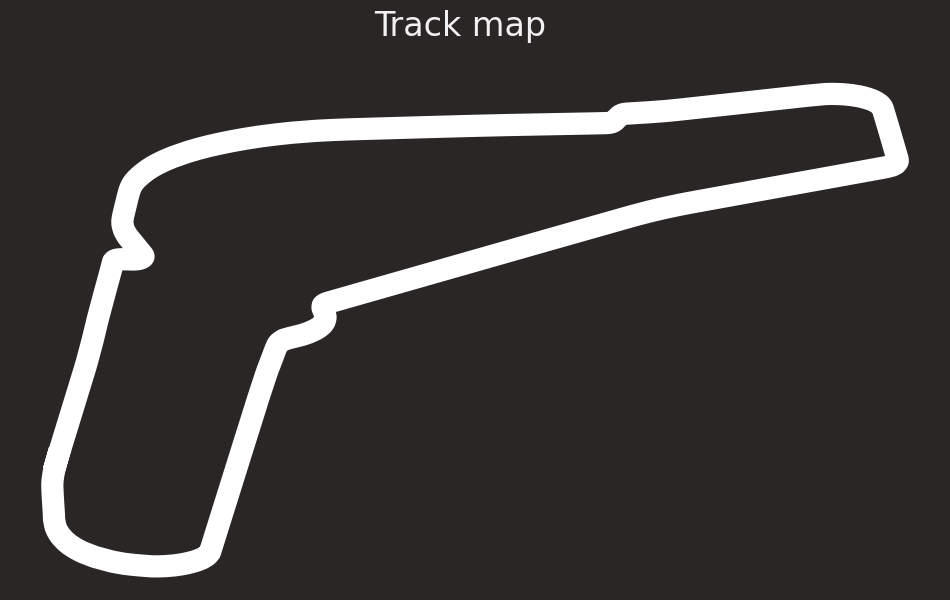

In [47]:
fig, ax = plot_track(lec_fast_lap)

# Add a title to the figure object
fig.suptitle(f'Track map', size=24, y=0.97);

The [`matplotlib` documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/multicolored_line.html#multicolored-lines) provides an example for generating a multicoloured line from a list of co-ordinates. Consecutive pairs of co-ordinates define consecutive line segments. The line segments are then coloured according to a particular colour mapped value.

The following function will generate a coloured trace overlaying the track map that visualises one of the telemetry measures. 

In [48]:
from matplotlib.collections import LineCollection
import matplotlib as mpl
import numpy as np

def get_multicoloured_line(lap, color='Speed', title='',
                           colormap=mpl.cm.plasma, linewidth=5,
                           ax=None):
    """Generate a matplotlib plottable mutlicoloured line."""
    if ax is None:
        fig, ax = plot_track(lap, linewidth=linewidth+2)
    else:
        fig = ax.get_figure()

    #############################################################
    # Create a set of line segments so that we can color them
    # individually. This creates the points as a N x 1 x 2 array
    # so that we can stack points together easily to get 
    # the segments. The segments array for line collection 
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    X = lap.telemetry['X'] 
    Y = lap.telemetry['Y']
    
    _color = lap.telemetry[color]
    
    points = np.array([X, Y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    if color is not None:
        # Create a continuous norm to map from data points to colors
        norm = plt.Normalize(_color.min(), _color.max())
        lc = LineCollection(segments, cmap=colormap,
                            norm=norm, linestyle='-', linewidth=5)
        # Set the values used for colormapping
        lc.set_array(_color)
    else:
        lc = LineCollection(segments,
                            linestyle='-', linewidth=linewidth)
    
    line = ax.add_collection(lc)
    # Add color bar legend
    fig.colorbar(line, ax=ax, orientation="horizontal")
    # Add title
    if title:
        fig.suptitle(f"{title} ({color})", size=24, y=0.97)
    return lc

We can now plot telemtry data traces against the position on track at which they we recorded:

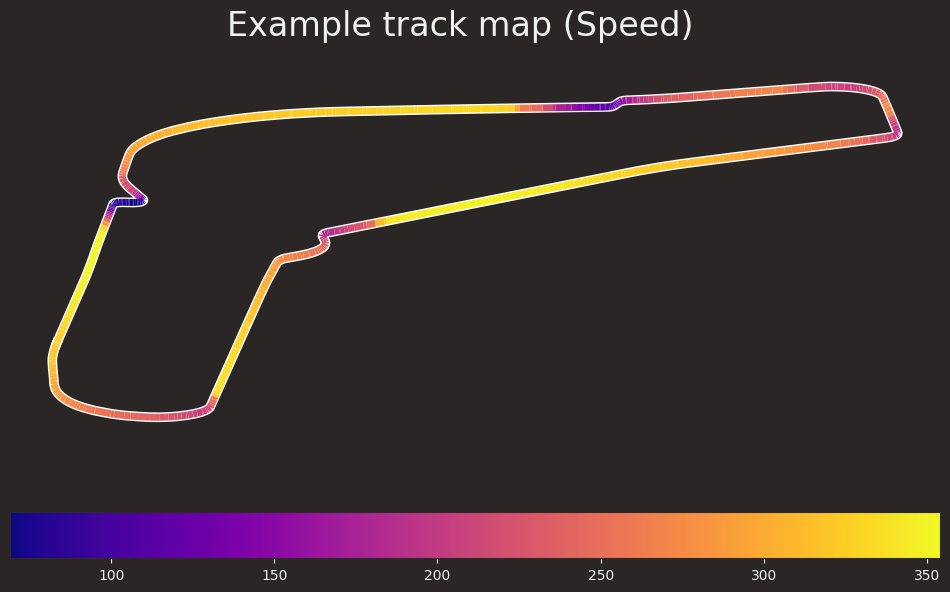

In [49]:
get_multicoloured_line(lec_fast_lap, title="Example track map");

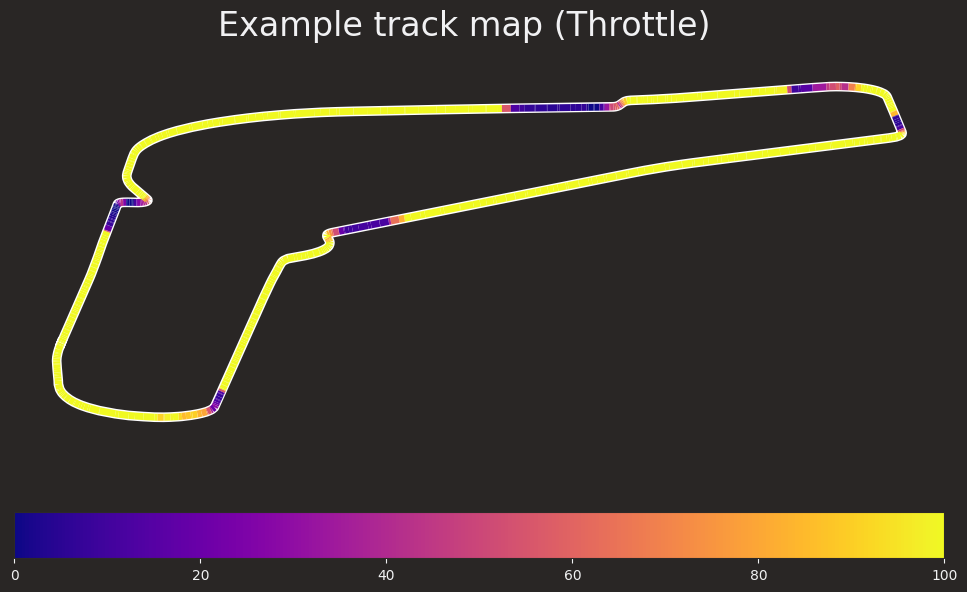

In [39]:
get_multicoloured_line(lec_fast_lap, "Throttle", title="Example track map");

## Retrieving Data from the ergast API

Basic support for retrieving data from the [*ergast* historical motor racing results data API](https://ergast.com/mrd/) is provided.

For example, we can return summary results data for a particular race (`"Race"`) or qualifying session (`"Qualifying`") in a particular season:

In [40]:
from fastf1 import ergast

erd_race = ergast.fetch_results(2022, 2, "Race")

erd_race[:1]

[{'number': '1',
  'position': '1',
  'positionText': '1',
  'points': '25',
  'Driver': {'driverId': 'max_verstappen',
   'permanentNumber': '33',
   'code': 'VER',
   'url': 'http://en.wikipedia.org/wiki/Max_Verstappen',
   'givenName': 'Max',
   'familyName': 'Verstappen',
   'dateOfBirth': '1997-09-30',
   'nationality': 'Dutch'},
  'Constructor': {'constructorId': 'red_bull',
   'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing',
   'name': 'Red Bull',
   'nationality': 'Austrian'},
  'grid': '4',
  'laps': '50',
  'status': 'Finished',
  'Time': {'millis': '5059293', 'time': '1:24:19.293'},
  'FastestLap': {'rank': '2',
   'lap': '50',
   'Time': {'time': '1:31.772'},
   'AverageSpeed': {'units': 'kph', 'speed': '242.191'}}}]

We can trivially cast the returned JSON data to a flattened `pandas` dataframe:

In [41]:
pd.json_normalize(erd_race).head()

,number,position,positionText,points,grid,laps,status,Driver.driverId,Driver.permanentNumber,Driver.code,...,Constructor.url,Constructor.name,Constructor.nationality,Time.millis,Time.time,FastestLap.rank,FastestLap.lap,FastestLap.Time.time,FastestLap.AverageSpeed.units,FastestLap.AverageSpeed.speed
0,1,1,1,25,4,50,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,5059293,1:24:19.293,2,50,1:31.772,kph,242.191
1,16,2,2,19,2,50,Finished,leclerc,16,LEC,...,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Ferrari,Italian,5059842,+0.549,1,48,1:31.634,kph,242.556
2,55,3,3,15,3,50,Finished,sainz,55,SAI,...,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Ferrari,Italian,5067390,+8.097,3,48,1:31.905,kph,241.841
3,11,4,4,12,1,50,Finished,perez,11,PER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,5070093,+10.800,4,46,1:32.042,kph,241.481
4,63,5,5,10,6,50,Finished,russell,63,RUS,...,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Mercedes,German,5092025,+32.732,7,43,1:32.821,kph,239.454


The *ergast* API can also provide season summary information:

In [42]:
pd.json_normalize(ergast.fetch_season(2022)).head(2).T

,0,1
season,2022,2022
round,1,2
url,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...
raceName,Bahrain Grand Prix,Saudi Arabian Grand Prix
date,2022-03-20,2022-03-27
time,15:00:00Z,17:00:00Z
Circuit.circuitId,bahrain,jeddah
Circuit.url,http://en.wikipedia.org/wiki/Bahrain_Internati...,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
Circuit.circuitName,Bahrain International Circuit,Jeddah Corniche Circuit
Circuit.Location.lat,26.0325,21.6319


## Summary

This chapter has provided a brief overview of some of the key features of the `fastf1` API, demonstrating how we can look up event metadata as well as lap information and car telemetry data.

Some support is also provided for improving the quality of data visualisations by setting appropriate colour schemes or configuring `matplotlib` axes, for example.